In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/areum/Desktop/POC시연자료/로지스틱.csv')

In [2]:
df['sex'] = df['sex'].map({'F':0, 'M':1})

In [3]:
df=df.dropna(axis=0)

In [4]:
df

,sex,height,age,weight,diastolic,systolic,temperature,pulse
0,0,133.0,98,34.0,98,175,36.7,90.0
1,0,136.4,82,43.6,69,131,36.5,98.0
2,0,139.0,67,53.0,61,98,36.5,99.0
3,0,139.3,95,53.4,67,118,36.5,111.0
4,0,140.0,84,40.0,73,131,36.5,72.0
...,...,...,...,...,...,...,...,...
2225,1,188.0,45,96.0,84,138,36.1,87.0
2226,1,188.0,35,95.0,98,151,37.1,102.0
2227,1,188.0,22,84.0,83,135,36.8,77.0
2228,1,189.0,28,97.0,91,144,36.1,73.0


In [5]:
df['height']=df['height'].astype(int)
df['weight']=df['weight'].astype(int)
df['temperature']=df['temperature'].astype(int)
df['pulse']=df['pulse'].astype(int)

In [6]:
df[df["sex"]==0]

,sex,height,age,weight,diastolic,systolic,temperature,pulse
0,0,133,98,34,98,175,36,90
1,0,136,82,43,69,131,36,98
2,0,139,67,53,61,98,36,99
3,0,139,95,53,67,118,36,111
4,0,140,84,40,73,131,36,72
...,...,...,...,...,...,...,...,...
1887,0,174,31,69,66,119,36,66
1919,0,174,47,93,101,152,36,79
1920,0,174,36,65,87,142,36,84
2000,0,176,74,75,74,111,36,125


In [7]:
x = df.iloc[:, 1:]
y = df.iloc[:, [0]]

In [11]:
df.columns[0]

'sex'

In [8]:
from sklearn.model_selection import train_test_split
train_x, test_x ,train_y, test_y = train_test_split(x, y, stratify=y,train_size=0.7,test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1549, 7) (665, 7) (1549, 1) (665, 1)


In [9]:
import statsmodels.api as sm

# sm.Logit

In [10]:
model = sm.Logit(train_y, train_x)
results = model.fit()  

Optimization terminated successfully.
         Current function value: 0.305098
         Iterations 8


In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    sex   No. Observations:                 1549
Model:                          Logit   Df Residuals:                     1542
Method:                           MLE   Df Model:                            6
Date:                Thu, 27 Jan 2022   Pseudo R-squ.:                  0.5597
Time:                        14:17:42   Log-Likelihood:                -472.60
converged:                       True   LL-Null:                       -1073.4
Covariance Type:            nonrobust   LLR p-value:                2.045e-256
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
height          0.3333      0.019     17.795      0.000       0.297       0.370
age             0.0444      0.006      7.239      0.000       0.032       0.056
weight          0.0246      0.009      2.758      0.006       0.007       0.042
diastolic      -0.0009      0.006     -0.155      0.877      -0.012       0.010
systolic        0.0153      0.005      2.792      0.005       0.005       0.026
temperature    -1.6817      0.090    -18.591      0.000      -1.859      -1.504
pulse           0.0073      0.006      1.199      0.231      -0.005       0.019
===============================================================================
"""

In [12]:
import numpy as np
np.exp(results.params)  # 오즈 비(Odds Ratio) 출력

height         1.395553
age            1.045430
weight         1.024935
diastolic      0.999128
systolic       1.015448
temperature    0.186053
pulse          1.007363
dtype: float64

Odds Ratio 

Odds Ratio란 Odds의 비율이다. Odds란 성공/실패와 같이 상호 배타적이며 전체를 이루고 있는 것들의 비율을 의미

# LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression() # 로지스틱 회귀 모델의 인스턴스를 생성
lr.fit(train_x, train_y) # 로지스틱 회귀 모델의 가중치를 학습

C:\Users\areum\conda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [15]:
print("coefficient = ", lr.coef_)

coefficient =  [[ 3.30521442e-01  4.39692528e-02  2.48988548e-02 -8.97882238e-04
   1.51696732e-02 -1.66664442e+00  7.09696702e-03]]


In [30]:
Y_pred = lr.predict(test_x)
print(Y_pred)

[0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0
 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0
 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1
 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1
 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0
 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0
 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1
 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 0
 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0
 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0
 0 1 0 0 0 0 1 1 0 1 0 1 

In [31]:
test_y

,sex
52,0
1116,1
2155,1
598,0
924,0
...,...
282,0
1658,1
670,0
1328,1


In [36]:
accuracy_score(test_y, Y_pred)

0.8766917293233083

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
feature_columns =df.columns.difference(["sex"])
data= df[feature_columns].to_numpy()
target = df["sex"].to_numpy()

In [25]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [26]:
data

array([[ 98,  98, 133, ..., 175,  36,  34],
       [ 82,  69, 136, ..., 131,  36,  43],
       [ 67,  61, 139, ...,  98,  36,  53],
       ...,
       [ 22,  83, 188, ..., 135,  36,  84],
       [ 28,  91, 189, ..., 144,  36,  97],
       [ 28,  72, 189, ..., 115,  36,  88]], dtype=int64)

In [27]:
df

,sex,height,age,weight,diastolic,systolic,temperature,pulse
0,0,133,98,34,98,175,36,90
1,0,136,82,43,69,131,36,98
2,0,139,67,53,61,98,36,99
3,0,139,95,53,67,118,36,111
4,0,140,84,40,73,131,36,72
...,...,...,...,...,...,...,...,...
2225,1,188,45,96,84,138,36,87
2226,1,188,35,95,98,151,37,102
2227,1,188,22,84,83,135,36,77
2228,1,189,28,97,91,144,36,73


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
ss=StandardScaler()
ss.fit(train_input)
#train_scaled=ss.transform(train_input)
#test_scaled=ss.transform(test_input)


train_scaled=train_input
test_scaled=test_input

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr=LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.88085827216262
0.8690744920993227


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt=DecisionTreeClassifier(random_state=42)

In [34]:
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

1.0
0.801354401805869


[Text(279.0, 317.09999999999997, 'height <= 164.5\ngini = 0.5\nsamples = 1771\nvalue = [864, 907]'),
 Text(139.5, 190.26, 'height <= 159.5\ngini = 0.297\nsamples = 936\nvalue = [766, 170]'),
 Text(69.75, 63.420000000000016, '\n  (...)  \n'),
 Text(209.25, 63.420000000000016, '\n  (...)  \n'),
 Text(418.5, 190.26, 'height <= 166.5\ngini = 0.207\nsamples = 835\nvalue = [98, 737]'),
 Text(348.75, 63.420000000000016, '\n  (...)  \n'),
 Text(488.25, 63.420000000000016, '\n  (...)  \n')]

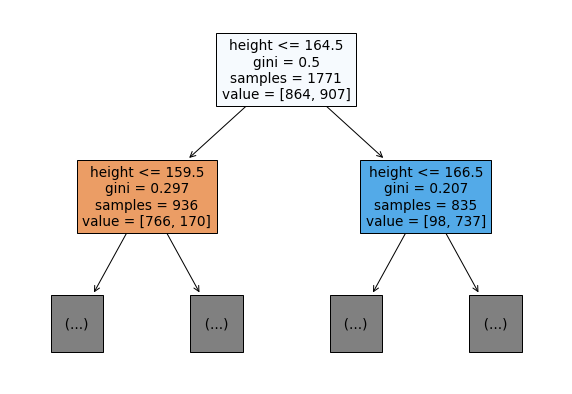

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['age', 'diastolic','height','pulse','systolic','temperature','weight'])

In [36]:
dt=DecisionTreeClassifier(max_depth=3,random_state=42)

In [37]:
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8797289666854884
0.8577878103837472


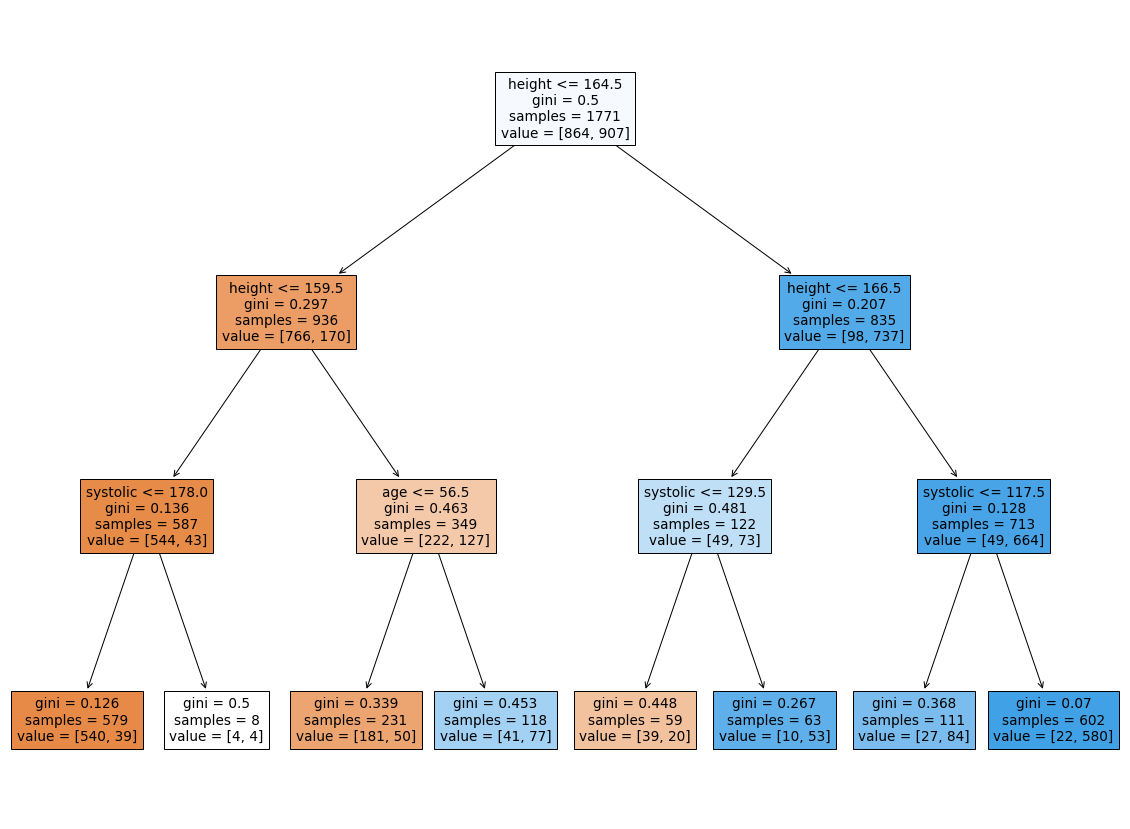

In [38]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['age', 'diastolic','height','pulse','systolic','temperature','weight'])
plt.show()

In [39]:
dt=DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input,train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8797289666854884
0.8577878103837472


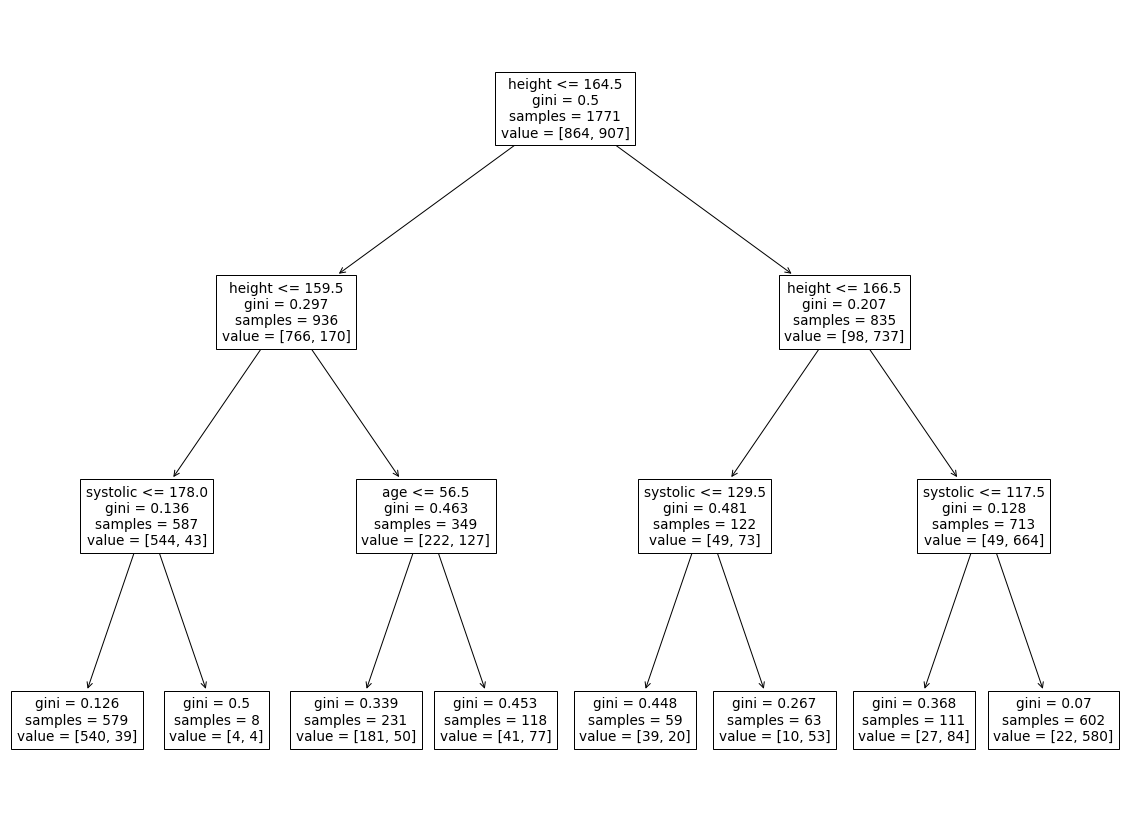

In [41]:
plt.figure(figsize=(20,15))
plot_tree(dt, feature_names=['age', 'diastolic','height','pulse','systolic','temperature','weight'])
plt.show()

In [40]:
list(x.columns.values)

['height', 'age', 'weight', 'diastolic', 'systolic', 'temperature', 'pulse']

In [2]:
from datetime import datetime
sd= datetime(2016, 8, 1)

In [3]:
sd

datetime.datetime(2016, 8, 1, 0, 0)